In [27]:
import pandas as pd
merged_df = pd.read_csv("merged_data.csv")

In [28]:
merged_df

#cur_unit   = 통화명        통화코드
#ttb                전신환(송금)받으실때
#tts                전신환(송금)보내실때
#deal_bas_r         매매 기준율
#bkpr               장부가격
#kftc_bkpr          서울외국환중개 매매기준율
#kftc_deal_bas_r    서울외국환중개 장부가격
#cur_nm             국가/통화명

,통화명,전일대비,date,ttb,tts,deal_bas_r,bkpr,kftc_bkpr,kftc_deal_bas_r,cur_nm
0,USD,0.60,2023-05-08,"1,312.34","1,338.85","1,325.6","1,325","1,325","1,325.6",미국 달러
1,JPY,-5.14,2023-05-08,971.06,990.67,980.87,980,980,980.87,일본 옌
2,EUR,-0.27,2023-05-08,"1,445.8","1,475.01","1,460.41","1,460","1,460","1,460.41",유로
3,HKD,0.09,2023-05-08,167.23,170.6,168.92,168,168,168.92,홍콩 달러
4,GBP,1.75,2023-05-08,"1,657.28","1,690.77","1,674.03","1,674","1,674","1,674.03",영국 파운드
...,...,...,...,...,...,...,...,...,...,...
457,THB,-0.31,2023-06-08,36.94,37.69,37.32,37,37,37.32,태국 바트
458,SGD,-7.20,2023-06-08,954.58,973.87,964.23,964,964,964.23,싱가포르 달러
459,IDR,-0.06,2023-06-08,8.65,8.82,8.74,8,8,8.74,인도네시아 루피아
460,MYR,-1.36,2023-06-08,280.04,285.69,282.87,282,282,282.87,말레이지아 링기트


In [29]:
unique_values = merged_df[['통화명', 'cur_nm']].drop_duplicates()
for index, row in unique_values.iterrows():
    print(row['통화명'], row['cur_nm'])


USD 미국 달러
JPY 일본 옌
EUR 유로
HKD 홍콩 달러
GBP 영국 파운드
CHF 스위스 프랑
CAD 캐나다 달러
AUD 호주 달러
NZD 뉴질랜드 달러
SEK 스웨덴 크로나
DKK 덴마아크 크로네
NOK 노르웨이 크로네
SAR 사우디 리얄
KWD 쿠웨이트 디나르
BHD 바레인 디나르
AED 아랍에미리트 디르함
THB 태국 바트
SGD 싱가포르 달러
IDR 인도네시아 루피아
MYR 말레이지아 링기트
BND 브루나이 달러


In [30]:
merged_df.dtypes

통화명                 object
전일대비               float64
date                object
ttb                 object
tts                 object
deal_bas_r          object
bkpr                object
kftc_bkpr           object
kftc_deal_bas_r     object
cur_nm              object
dtype: object

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
# 전일대비 컬럼의 데이터 타입 변경
merged_df['전일대비'] = merged_df['전일대비'].astype(float)

# ttb, tts, deal_bas_r, bkpr, kftc_bkpr, kftc_deal_bas_r 컬럼의 데이터 타입 변경
merged_df['ttb'] = merged_df['ttb'].str.replace(',', '').astype(float)
merged_df['tts'] = merged_df['tts'].str.replace(',', '').astype(float)
merged_df['deal_bas_r'] = merged_df['deal_bas_r'].str.replace(',', '').astype(float)
merged_df['bkpr'] = merged_df['bkpr'].str.replace(',', '').astype(float)
merged_df['kftc_bkpr'] = merged_df['kftc_bkpr'].str.replace(',', '').astype(float)
merged_df['kftc_deal_bas_r'] = merged_df['kftc_deal_bas_r'].str.replace(',', '').astype(float)


# date 컬럼의 데이터 타입 변경
merged_df['date'] = pd.to_datetime(merged_df['date'])


In [32]:
grouped_stats = merged_df.groupby('통화명')[['전일대비', 'ttb', 'tts', 'deal_bas_r', 'bkpr', 'kftc_bkpr', 'kftc_deal_bas_r']].describe()
print(grouped_stats)


     전일대비                                                              ttb   
    count      mean        std    min      25%    50%     75%    max count   
통화명                                                                          
AED  22.0 -0.576818   1.444495  -3.39  -1.8150 -0.070  0.5750   1.25  22.0  \
AUD  22.0 -0.487273   4.505676  -8.24  -4.2025  0.130  2.6500  10.10  22.0   
BHD  22.0 -5.931818  14.213803 -32.89 -17.8400 -0.870  5.4325  11.41  22.0   
BND  22.0 -2.300909   6.099920 -14.57  -7.5975 -1.305  2.6650   6.74  22.0   
CAD  22.0 -0.311364   6.362418 -10.18  -6.1550  1.185  3.2625  15.50  22.0   
CHF  22.0 -2.318182   7.552445 -13.96  -9.4775 -1.410  3.0950  11.10  22.0   
DKK  22.0 -0.428636   1.224330  -2.76  -1.1050 -0.645  0.3575   2.40  22.0   
EUR  22.0 -2.102727   6.030652 -13.80  -6.9300 -1.115  2.8825   7.66  22.0   
GBP  22.0 -1.830455   6.958099 -15.85  -7.9675  0.405  4.1750   8.09  22.0   
HKD  22.0 -0.270909   0.678408  -1.60  -0.8675  0.000  0.2575   

C:\Users\young\AppData\Local\Temp\ipykernel_988\1795205602.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_df, x='통화명', y='kftc_bkpr', ci=None)


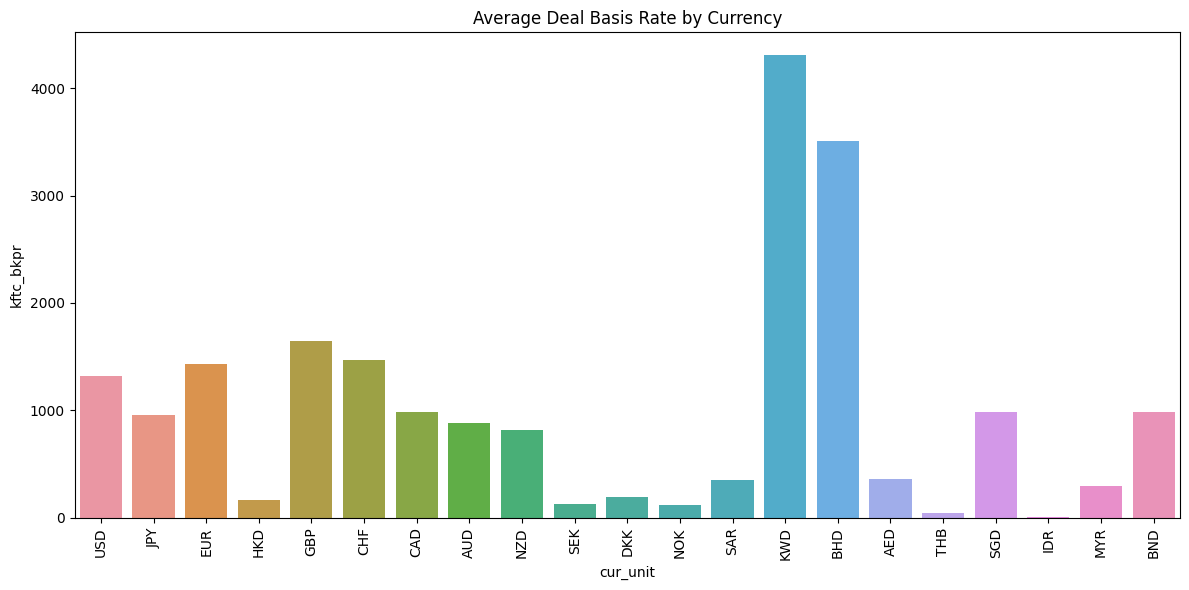

In [33]:
# 통화명별 거래 기준율 (deal_bas_r) 평균 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df, x='통화명', y='kftc_bkpr', ci=None)
plt.xticks(rotation=90)
plt.xlabel('cur_unit')
plt.ylabel('kftc_bkpr')
plt.title('Average Deal Basis Rate by Currency')
plt.tight_layout()
plt.show()


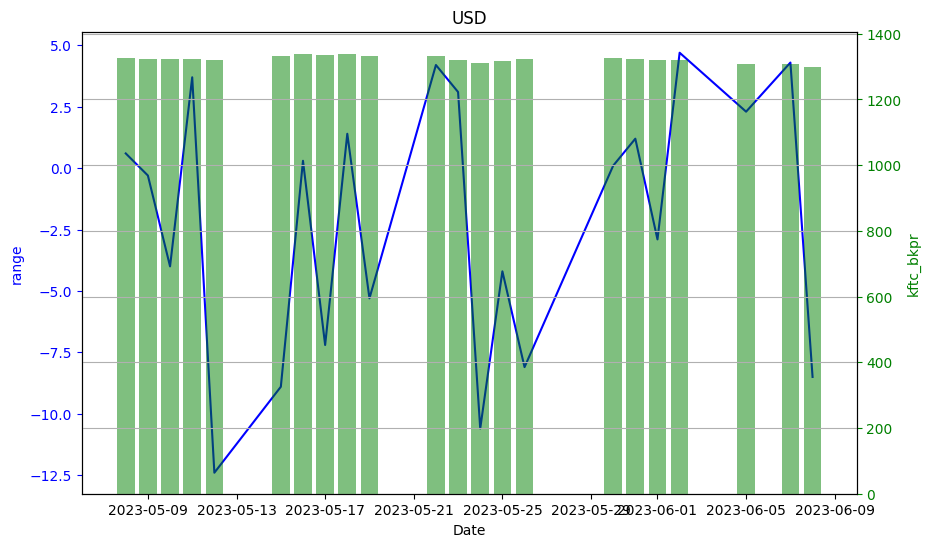

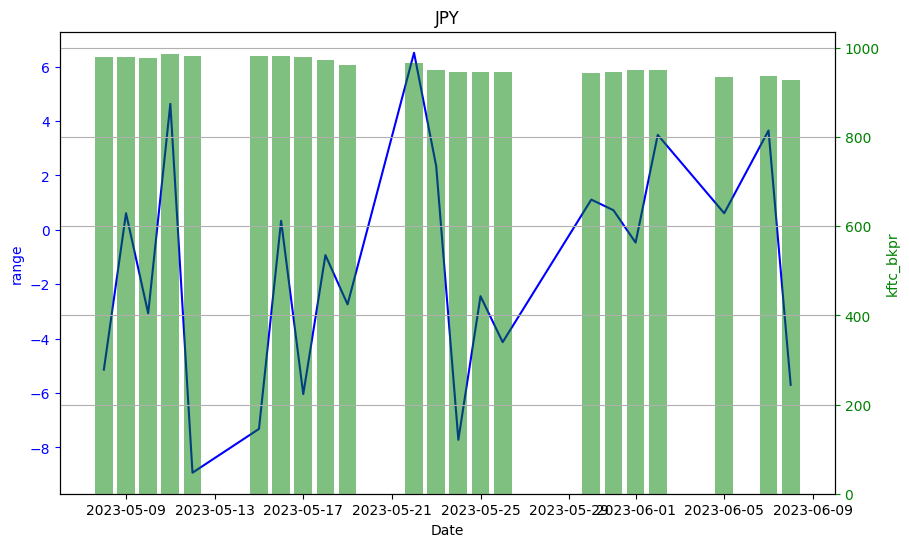

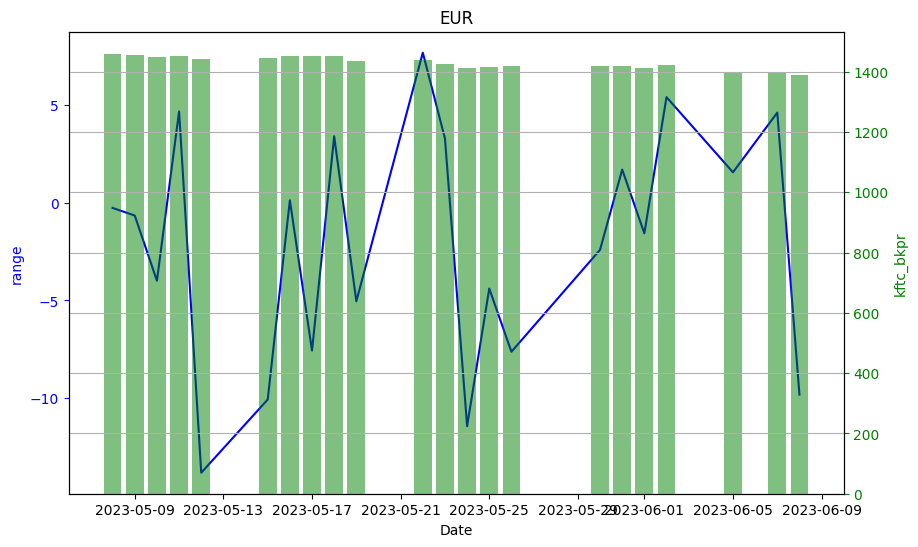

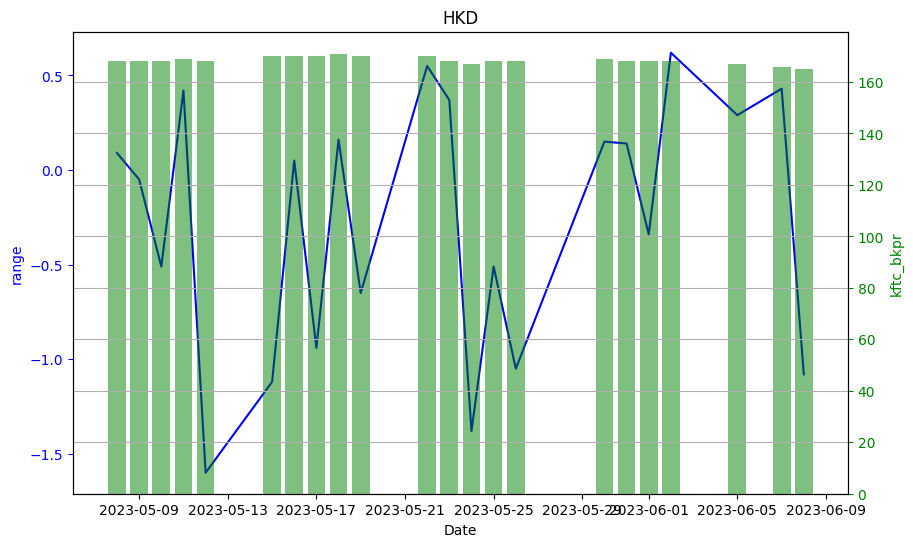

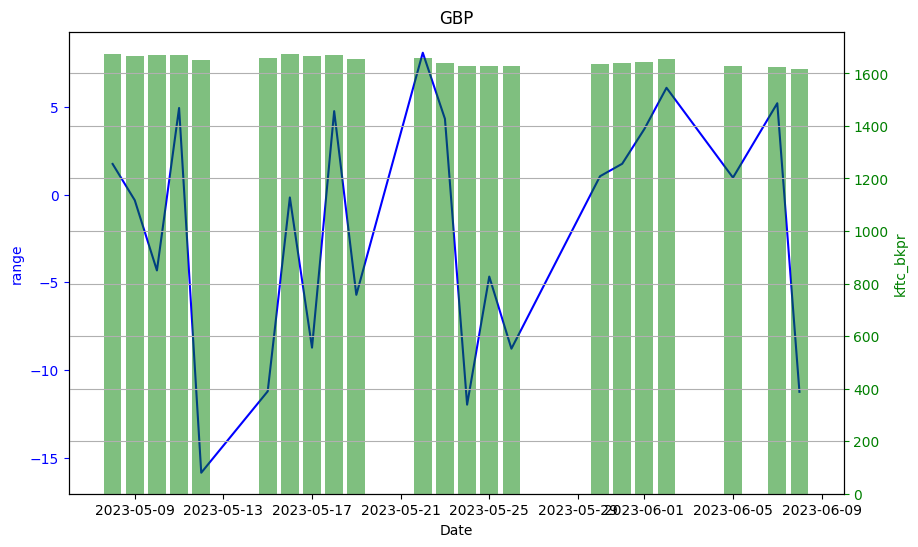

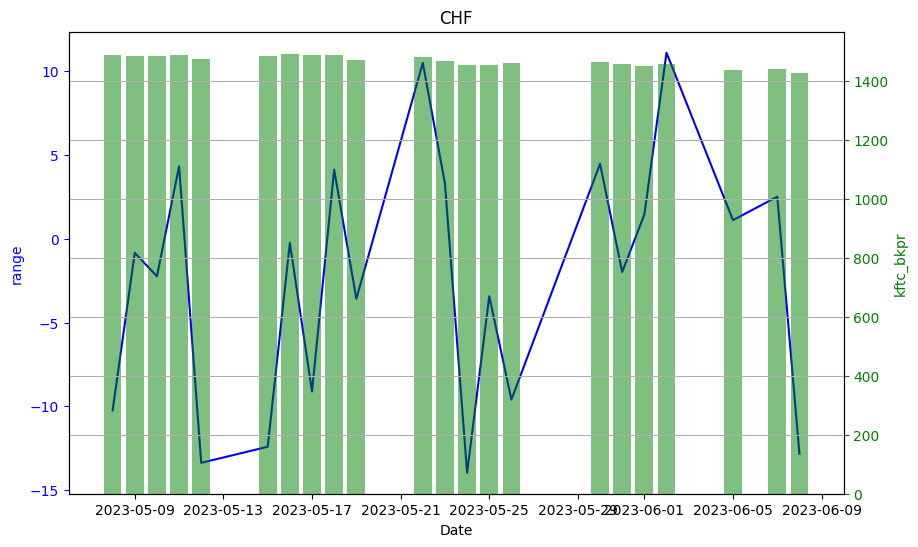

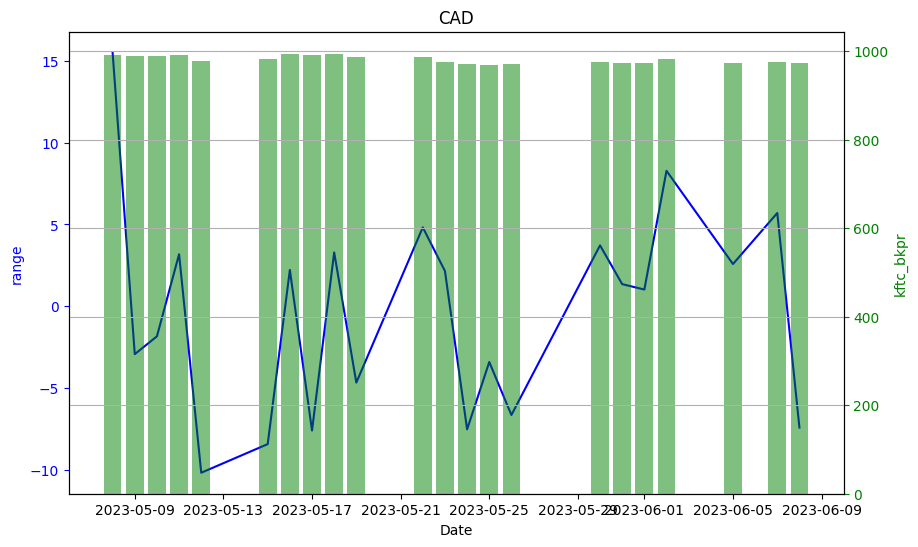

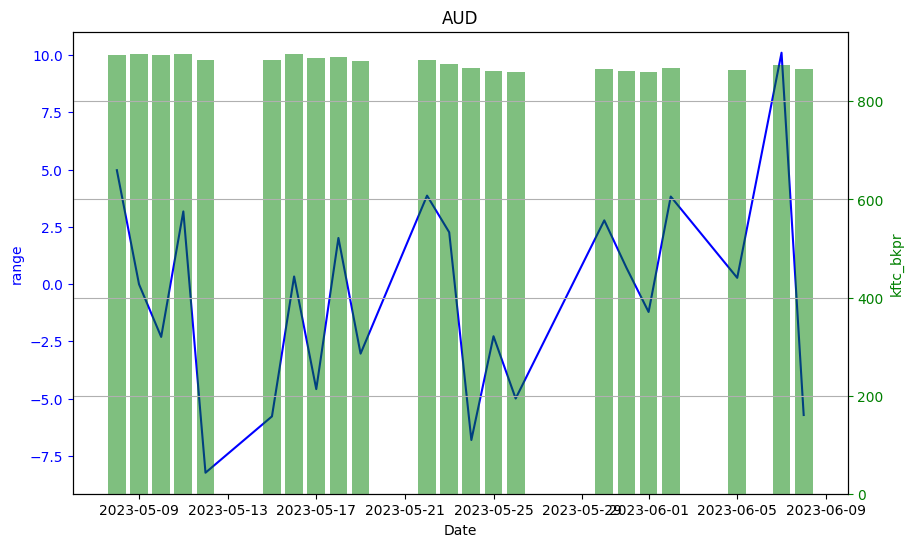

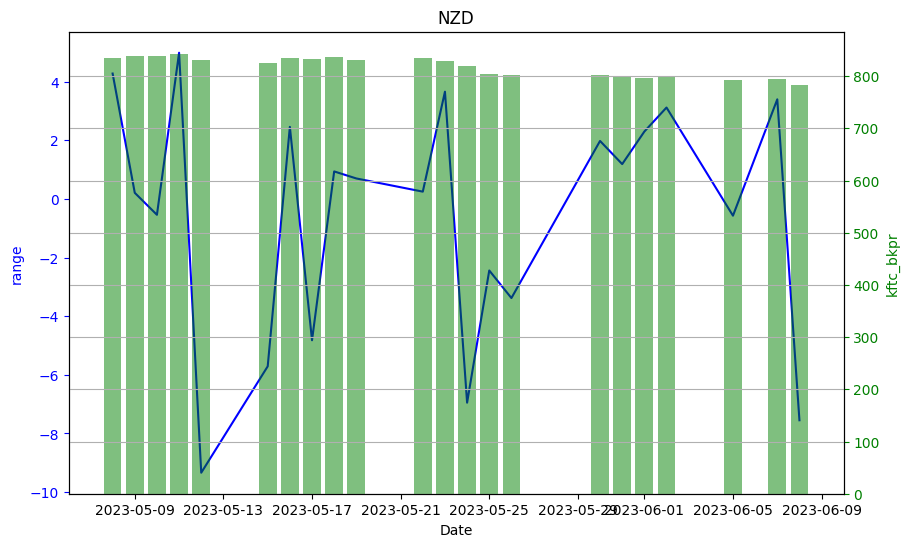

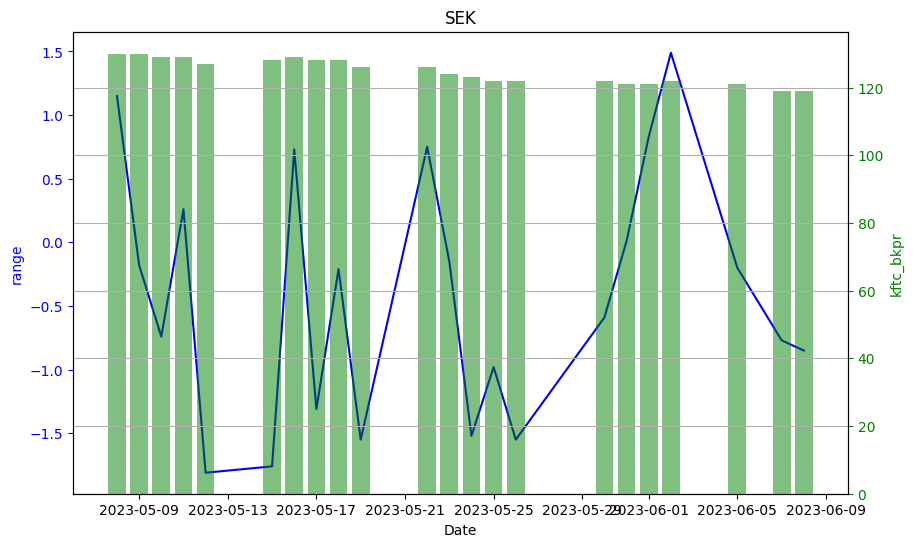

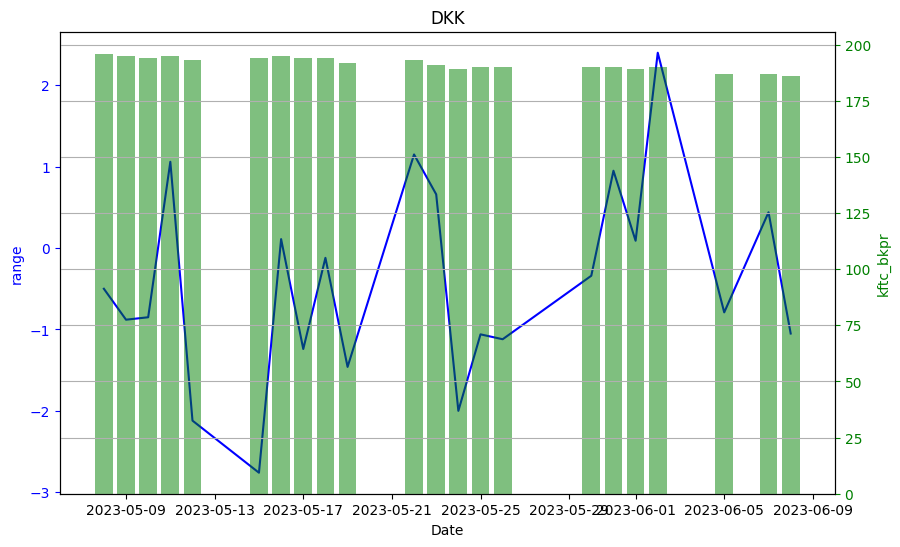

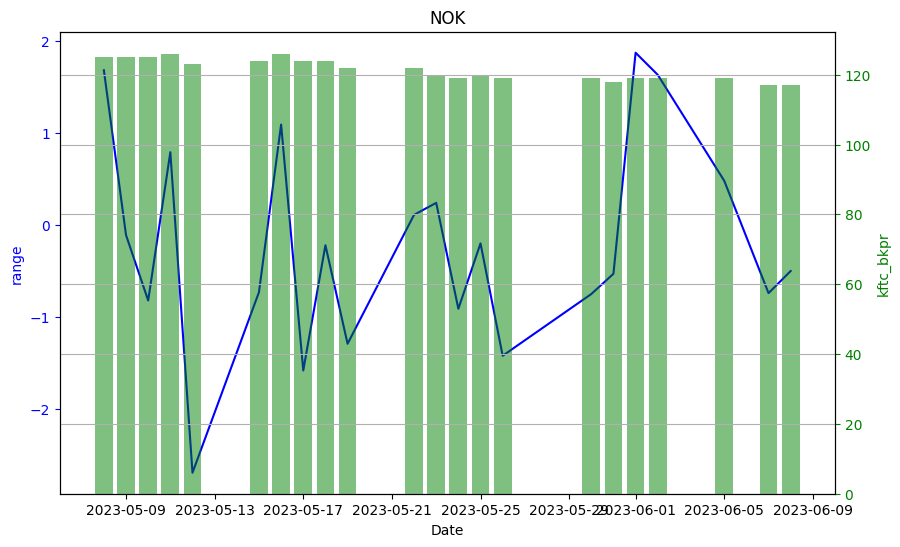

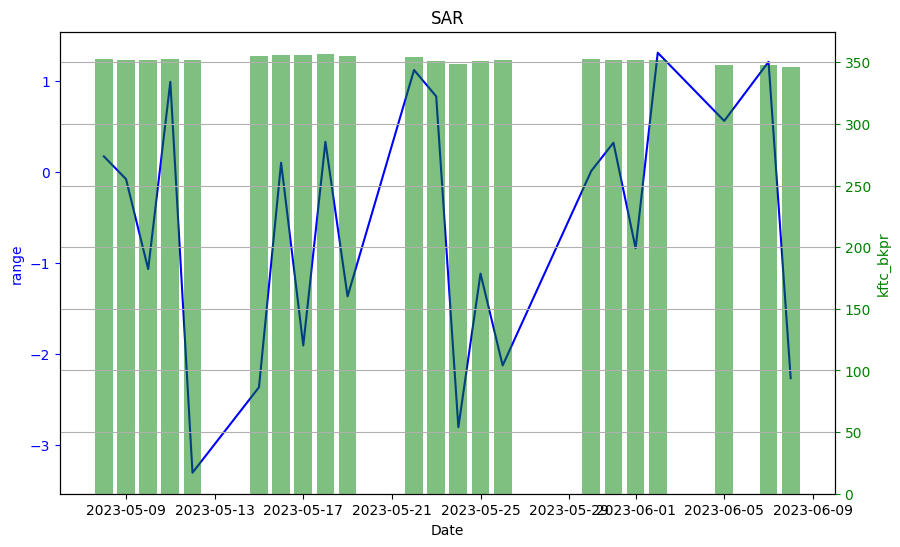

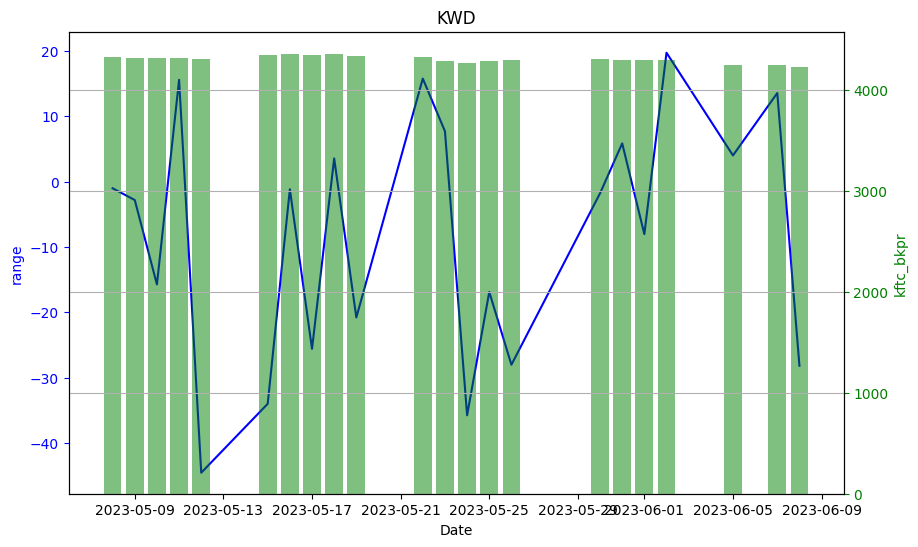

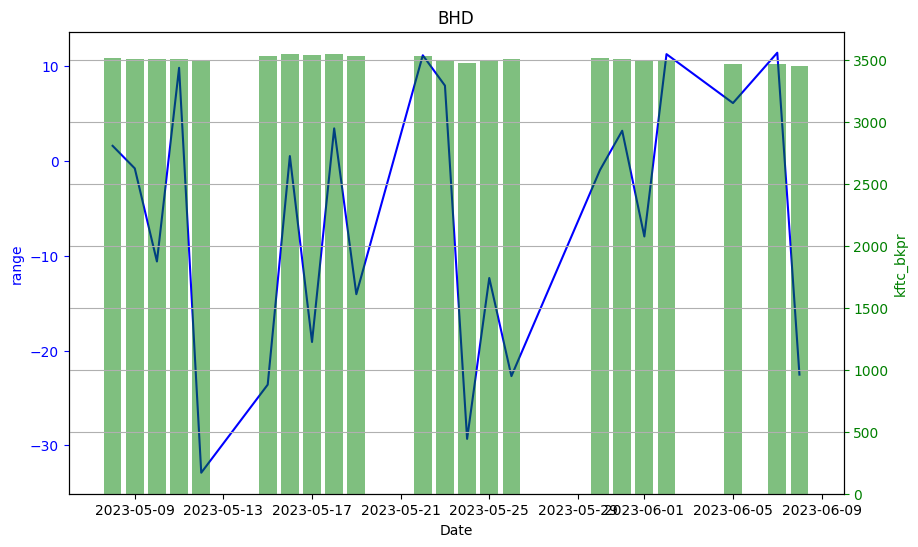

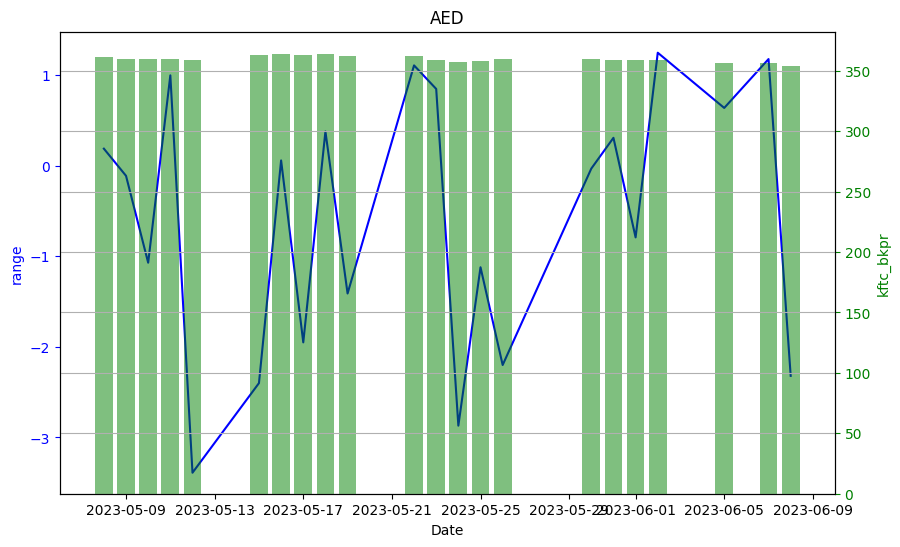

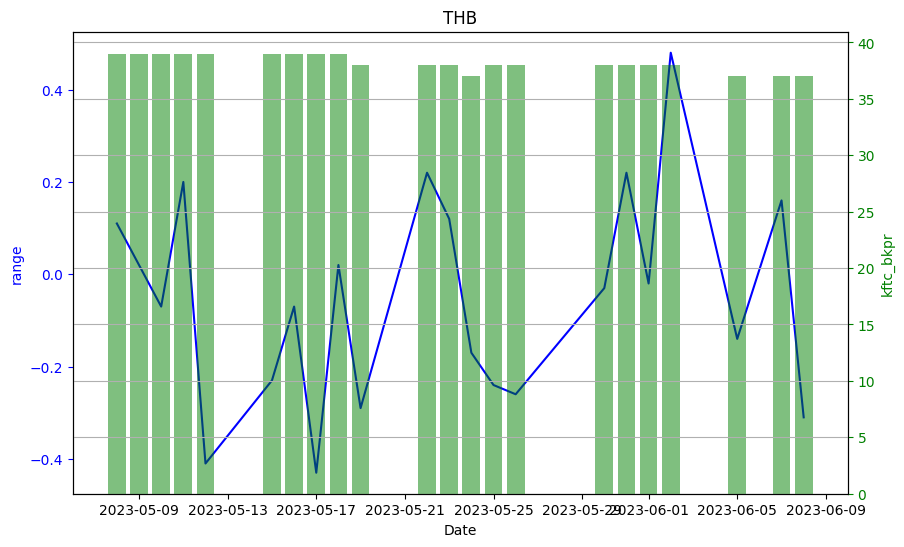

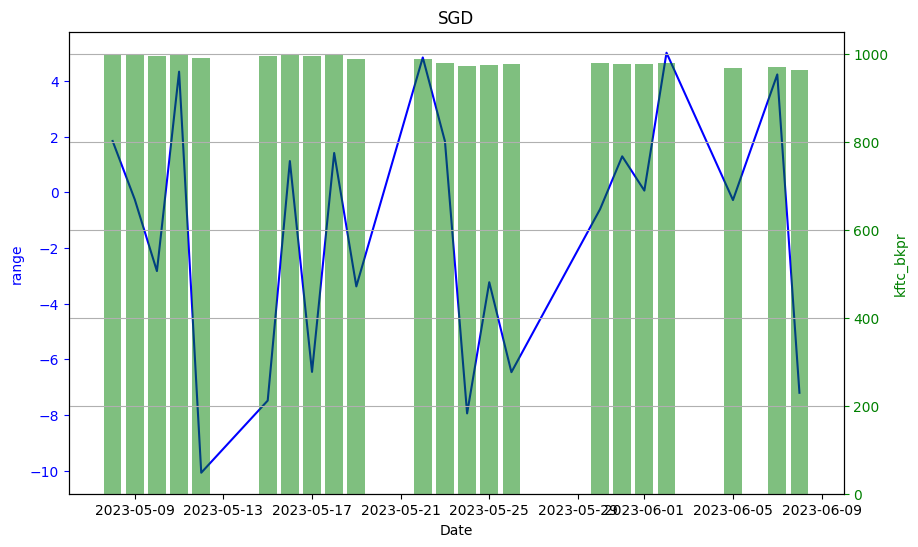

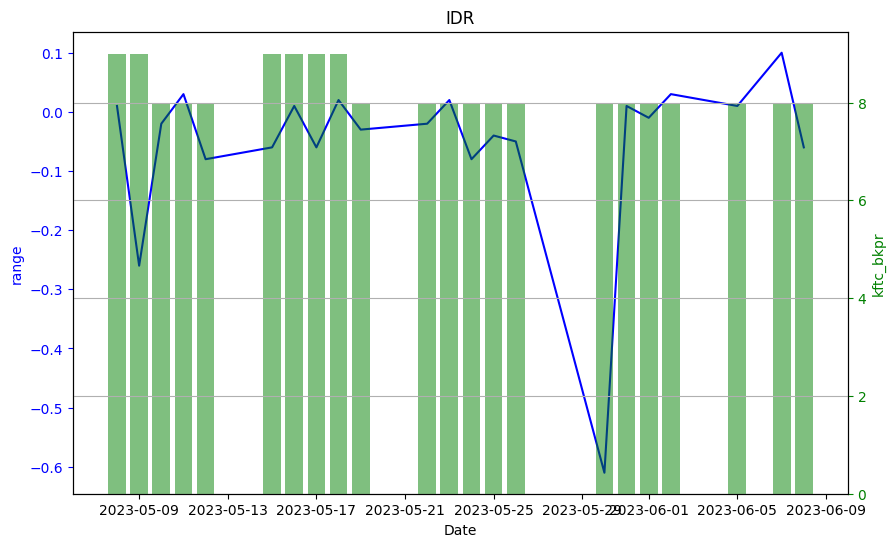

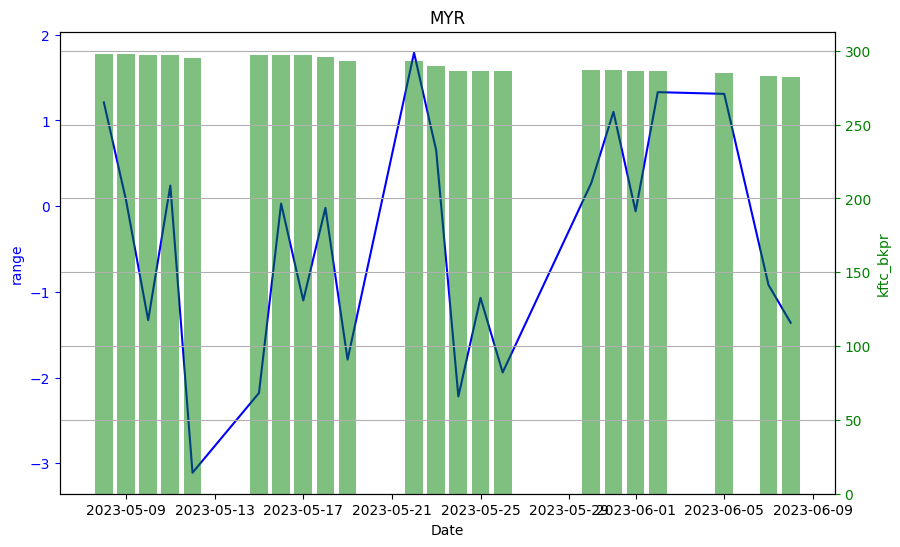

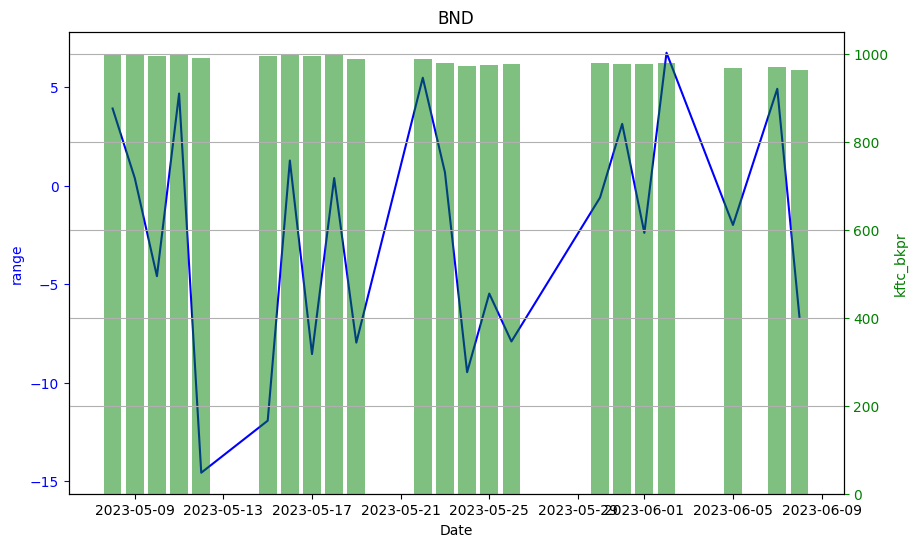

In [34]:
# 통화명 리스트
currency_list = ['USD', 'JPY', 'EUR', 'HKD', 'GBP', 'CHF', 'CAD', 'AUD', 'NZD', 'SEK', 'DKK', 'NOK', 'SAR', 'KWD', 'BHD', 'AED', 'THB', 'SGD', 'IDR', 'MYR', 'BND']

# 통화명 별 시계열 데이터 분석 및 시각화
for currency in currency_list:
    # 원본 데이터프레임 복사
    currency_data = merged_df[merged_df['통화명'] == currency].copy()
    
    # 전일대비와 kftc_bkpr 컬럼을 시계열 데이터로 변환
    currency_data['date'] = pd.to_datetime(currency_data['date'])
    currency_data.set_index('date', inplace=True)
    
    # 시계열 그래프 그리기
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # 전일대비 꺾은선 그래프
    ax1.plot(currency_data['전일대비'], color='blue')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('range', color='blue')
    ax1.tick_params('y', colors='blue')
    
    # kftc_bkpr 막대 그래프
    ax2 = ax1.twinx()
    ax2.bar(currency_data.index, currency_data['kftc_bkpr'], color='green', alpha=0.5)
    ax2.set_ylabel('kftc_bkpr', color='green')
    ax2.tick_params('y', colors='green')
    
    plt.title(currency)
    plt.grid(True)
    plt.show()
